<a href="https://colab.research.google.com/github/pgtas001/iabac-project/blob/main/B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns

In [22]:
#loading the data
data = pd.read_csv("comcast_consumeraffairs_complaints.csv")

In [23]:
data.head()


,author,posted_on,rating,text
0,"Alantae of Chesterfeild, MI","Nov. 22, 2016",1,I used to love Comcast. Until all these consta...
1,"Vera of Philadelphia, PA","Nov. 19, 2016",1,I'm so over Comcast! The worst internet provid...
2,"Sarah of Rancho Cordova, CA","Nov. 17, 2016",1,If I could give them a negative star or no sta...
3,"Dennis of Manchester, NH","Nov. 16, 2016",1,I've had the worst experiences so far since in...
4,"Ryan of Bellevue, WA","Nov. 14, 2016",1,Check your contract when you sign up for Comca...


# Step 2 Explore the data

In [24]:
data.shape

(5659, 4)

In [25]:
data.rating.value_counts()

1    3734
0    1560
2     260
3      54
5      32
4      19
Name: rating, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


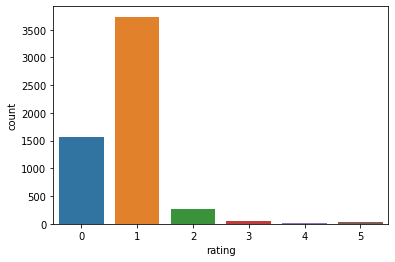

In [26]:

sns.countplot(data['rating'])

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5659 entries, 0 to 5658
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   author     5659 non-null   object
 1   posted_on  5659 non-null   object
 2   rating     5659 non-null   int64 
 3   text       5629 non-null   object
dtypes: int64(1), object(3)
memory usage: 177.0+ KB


#Step 3: Data preprocessing

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

In [29]:
documents = data['text'].values.astype("U")

In [30]:
vectorizer = TfidfVectorizer(stop_words='english')
features = vectorizer.fit_transform(documents)

In [32]:
k = 20
model = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1)
model.fit(features)

KMeans(max_iter=100, n_clusters=20, n_init=1)

In [34]:
data['cluster'] = model.labels_

In [35]:
data.head()

,author,posted_on,rating,text,cluster
0,"Alantae of Chesterfeild, MI","Nov. 22, 2016",1,I used to love Comcast. Until all these consta...,11
1,"Vera of Philadelphia, PA","Nov. 19, 2016",1,I'm so over Comcast! The worst internet provid...,6
2,"Sarah of Rancho Cordova, CA","Nov. 17, 2016",1,If I could give them a negative star or no sta...,3
3,"Dennis of Manchester, NH","Nov. 16, 2016",1,I've had the worst experiences so far since in...,11
4,"Ryan of Bellevue, WA","Nov. 14, 2016",1,Check your contract when you sign up for Comca...,7


# output the result to a text file.

In [36]:
clusters = data.groupby('cluster')   

In [48]:
for cluster in clusters.groups:
    f = open('cluster'+str(cluster)+ '.csv', 'w') # create csv file
    df = clusters.get_group(cluster)[['author','posted_on','rating','text']] # get title and overview columns
    f.close()

In [41]:
print("Cluster centroids: \n")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

for i in range(k):
    print("Cluster %d:" % i)
    for j in order_centroids[i, :10]: #print out 10 feature terms of each cluster
        print (' %s' % terms[j])
    print('------------')

Cluster centroids: 

Cluster 0:
 package
 comcast
 month
 told
 card
 99
 service
 called
 internet
 promotion
------------
Cluster 1:
 said
 called
 told
 service
 rep
 asked
 supervisor
 comcast
 account
 phone
------------
Cluster 2:
 nan
 zoom
 e8
 earthlink
 earth
 earsi
 ears
 earning
 earned
 earn
------------
Cluster 3:
 service
 customer
 company
 comcast
 worst
 time
 just
 don
 horrible
 phone
------------
Cluster 4:
 installation
 service
 told
 fee
 install
 comcast
 called
 cable
 order
 phone
------------
Cluster 5:
 00
 month
 comcast
 service
 told
 pay
 internet
 charge
 cable
 charged
------------
Cluster 6:
 service
 internet
 phone
 comcast
 problem
 hours
 home
 time
 business
 times
------------
Cluster 7:
 contract
 year
 comcast
 service
 told
 termination
 fee
 signed
 month
 years
------------
Cluster 8:
 price
 month
 service
 comcast
 internet
 99
 customer
 told
 year
 package
------------
Cluster 9:
 modem
 comcast
 service
 internet
 told
 new
 called
 s

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

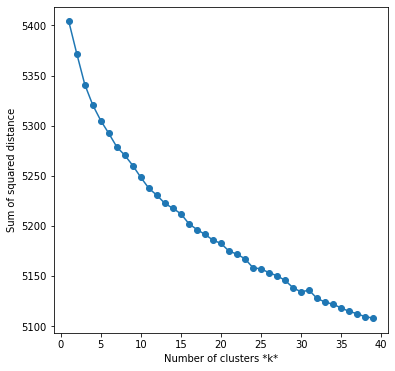

In [47]:
# Evaluation
# Run the Kmeans algorithm and get the index of data points clusters
sse = []
list_k = list(range(1, 40))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(features)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

NameError: ignored

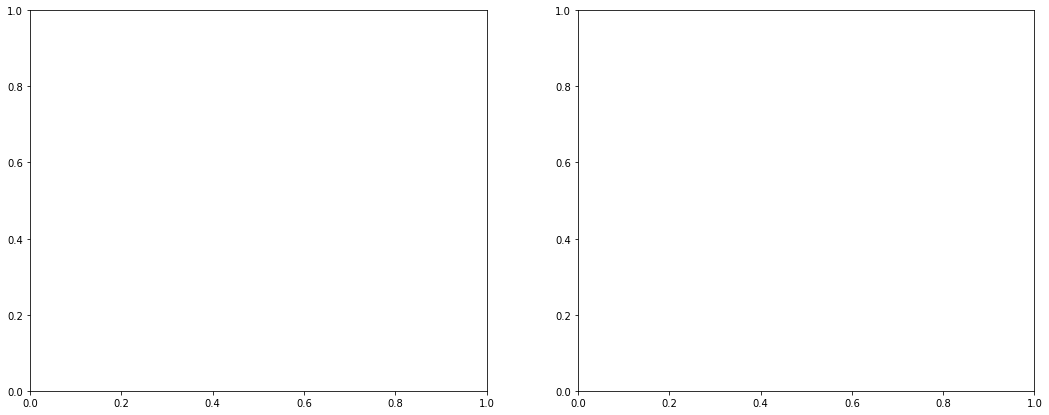

In [50]:
for i, k in enumerate([10,15,20,25,30,35,40]):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    # Run the Kmeans algorithm
    km = KMeans(n_clusters=k)
    labels = km.fit_predict(features)
    centroids = km.cluster_centers_

    # Get silhouette samples
    silhouette_vals = silhouette_samples(features, labels)

    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score and plot it
    avg_score = np.mean(silhouette_vals)
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Silhouette coefficient values')
    ax1.set_ylabel('Cluster labels')
    ax1.set_title('Silhouette plot for the various clusters', y=1.02);
    
    # Scatter plot of data colored with labels
    ax2.scatter(X_std[:, 0], X_std[:, 1], c=labels)
    ax2.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='r', s=250)
    ax2.set_xlim([-2, 2])
    ax2.set_xlim([-2, 2])
    ax2.set_xlabel('Eruption time in mins')
    ax2.set_ylabel('Waiting time to next eruption')
    ax2.set_title('Visualization of clustered data', y=1.02)
    ax2.set_aspect('equal')
    plt.tight_layout()
    plt.suptitle(f'Silhouette analysis using k = {k}',
                 fontsize=16, fontweight='semibold', y=1.05);